# 피보나치 수열
: Fibonacci sequence 수학에서 다루는 수열. 이 수열의 항들을 피보나치 수(Fibonacci number)라 부른다. 다음과 같은 점화식으로 피보나치 수열을 정의할 수 있다.

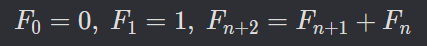

In [3]:
from IPython.display import Image
Image('images/fibo2.png')

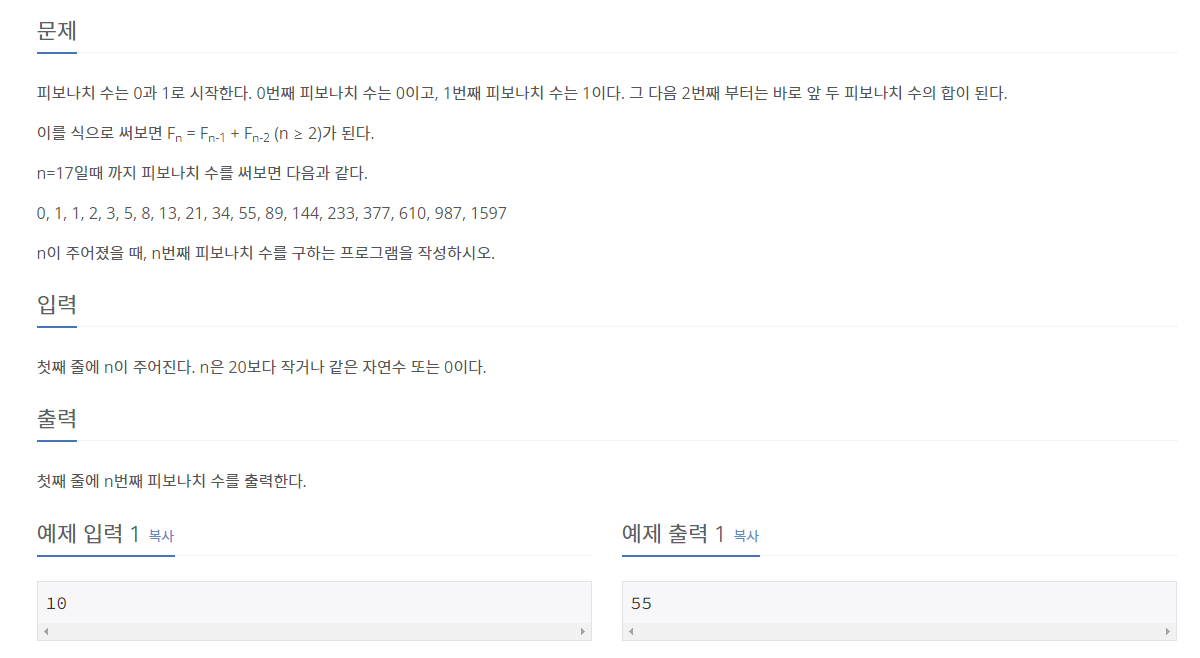

In [2]:
from IPython.display import Image
Image('images/fibo.png')

In [5]:
# 앞서의 점화식을 통해 간단히 구현
def fibo(n):
    if n == 0 or n == 1:
        return n

    else:
        return fibo(n-1) + fibo(n-2)

n = int(input())
print(fibo(n))

10
55


- 하지만 위의 함수는 단순한만큼 문제점이 있다.
- 컴퓨터는 f(5)를 구하기 위해서 f(4)와 f(3)을 구해야 하고, f(4)와 f(3)을 구하기 위해서 각각 f(3), f(2) / f(2), f(1)을 구해야 한다.
- 이때 중복되는 계산이 너무 많이 나온다.

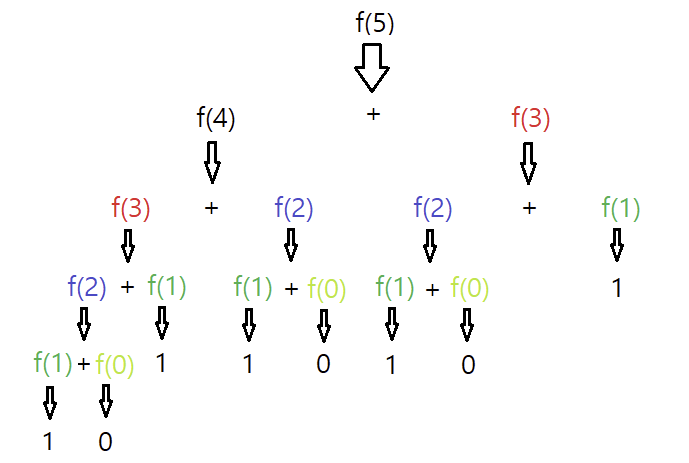

In [6]:
from IPython.display import Image
Image('images/fibo3.png')

- n이 늘어날 수록 중복 계산의 문제는 기하급수적으로 늘어나게 된다.(시간복잡도 O(2^n))
- 그래서 다이나믹 프로그래밍을 사용할 것!

## 다이나믹프로그래밍 (Dynamic Programming)

: 다이나믹 프로그래밍이란 중복되는 계산이 나왔을 때 전에 계산했던 값을 불러오는 방식. 또한 이러한 기법을 메모이제이션(Memoization)이라고 한다.

**다이나믹 프로그래밍을 이용하는 경우**
1) 최적 부분 구조 (Optimal Substructure)
큰 문제를 작은 문제로 나눌 수 있고, 작은 문제의 답을 모아 큰 문제를 해결할 수 있는 경우

2) 중복되는 부분 문제 (Overlapping Subproblem)
동일한 작은 문제를 반복적으로 해결해야 하는 경우

In [7]:
memo = [-1] * 100 # (1)
def fibo(n):
    if n == 0 or n == 1:
        return n

    if memo[n] != -1: # (2)
        return memo[n]

    memo[n] = fibo(n-1) + fibo(n-2) #(3)
    return memo[n]

n = int(input())
print(fibo(n))

10
55


- (1) 값을 저장하기 위한 리스트를 만든다.
- (2) 리스트의 원소가 -1이 아니라면 다른 값이 저장되었다는 뜻
- (3) 저장되지 않은 값은 계산해서 저장한다.

### 시간복잡도는 어떻게 변하였을까?

In [12]:
# 기본 코드
import time as t
s = t.time()

def fibo(n):
    if n == 0 or n == 1:
        return n
    else:
        return fibo(n-1) + fibo(n-2)

print(fibo(10))
e = t.time()
print(e-s)

55
0.0015251636505126953


In [13]:
# 다이나믹프로그래밍 코드
import time as t
s = t.time()

memo = [-1] * 100 # (1)
def fibo(n):
    if n == 0 or n == 1:
        return n

    if memo[n] != -1: # (2)
        return memo[n]

    memo[n] = fibo(n-1) + fibo(n-2) #(3)
    return memo[n]
print(fibo(10))
e = t.time()
print(e-s)

55
0.0009996891021728516


**n이 늘어나면?**

In [15]:
# 기본 코드
import time as t
s = t.time()

def fibo(n):
    if n == 0 or n == 1:
        return n
    else:
        return fibo(n-1) + fibo(n-2)

print(fibo(35))
e = t.time()
print(e-s)

9227465
12.239546537399292


In [16]:
# 다이나믹프로그래밍 코드
import time as t
s = t.time()

memo = [-1] * 100 # (1)
def fibo(n):
    if n == 0 or n == 1:
        return n

    if memo[n] != -1: # (2)
        return memo[n]

    memo[n] = fibo(n-1) + fibo(n-2) #(3)
    return memo[n]
print(fibo(35))
e = t.time()
print(e-s)

9227465
0.0005075931549072266


확실히 차이가 보인다...